In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model



In [25]:
df = pd.read_excel("audio_dataset.xlsx")

In [5]:
df.head()

,Unnamed: 0,File Name,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,low,good,excellent,category
0,0,29_audio.wav,-2.558627,-2.316059,-2.271928,-2.167459,-1.012644,-0.766544,-0.730626,-1.649334,...,0.501104,0.380764,0.364891,0.427991,0.439193,0.484969,0.709890,0.680682,0.702986,1
1,1,68_audio.wav,-2.980663,-2.736011,-0.521187,-0.848618,-0.707429,0.423838,0.410516,1.267307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,92_audio.wav,-2.492121,-2.465798,-2.489711,-2.413806,-1.183820,-1.316758,-0.989441,-1.236956,...,0.363995,0.025381,0.000000,0.000000,0.000000,0.000000,0.744238,0.678753,0.732652,1
3,3,167_audio.wav,-3.142767,-1.895777,-0.817423,-0.956117,0.305237,0.640528,1.312892,1.152519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,214_audio.wav,-2.754371,-2.753473,-2.753528,-0.933587,-0.711726,-0.917892,-1.716798,-1.058946,...,0.322358,-0.043042,0.000668,0.040334,0.112364,0.326456,0.000000,0.000000,0.000000,0


In [6]:
df['category']

0        1
1        0
2        1
3        0
4        0
        ..
10016    1
10017    2
10018    1
10019    3
10020    3
Name: category, Length: 10021, dtype: int64

In [7]:

import matplotlib.pyplot as plt


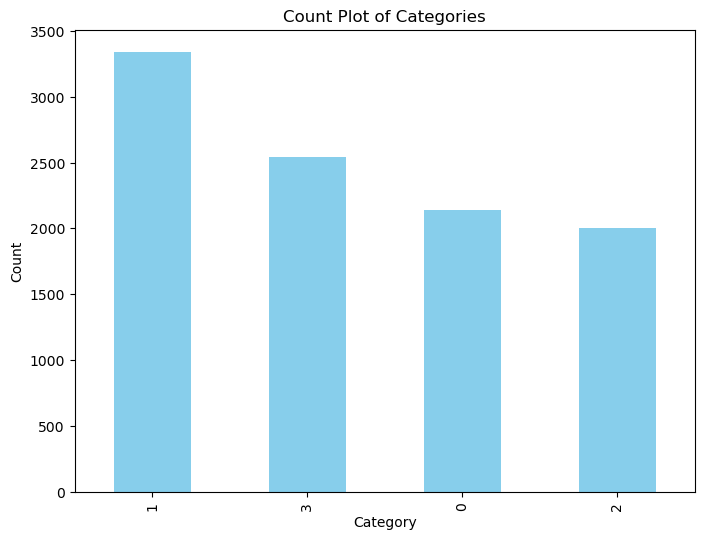

In [8]:

# Count plot
plt.figure(figsize=(8, 6))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10021 non-null  int64  
 1   File Name   10021 non-null  object 
 2   0           10021 non-null  float64
 3   1           10021 non-null  float64
 4   2           10021 non-null  float64
 5   3           10021 non-null  float64
 6   4           10021 non-null  float64
 7   5           10021 non-null  float64
 8   6           10021 non-null  float64
 9   7           10021 non-null  float64
 10  8           10021 non-null  float64
 11  9           10021 non-null  float64
 12  10          10021 non-null  float64
 13  11          10021 non-null  float64
 14  12          10021 non-null  float64
 15  13          10021 non-null  float64
 16  14          10021 non-null  float64
 17  15          10021 non-null  float64
 18  16          10021 non-null  float64
 19  17          10021 non-nul

In [10]:
df.drop(['Unnamed: 0'], axis= 1 ,inplace = True)

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,low,good,excellent,category
count,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,...,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000
mean,-2.933617,-2.379532,-1.993281,-1.528550,-1.235209,-1.292886,-1.307355,-1.175128,-0.962221,-0.698962,...,0.158317,0.160967,0.134690,0.125582,0.127189,0.127814,0.249496,0.376383,0.479972,1.492965
std,0.364519,0.453601,0.716084,0.718234,0.548814,0.566529,0.695869,0.913354,1.102119,1.220488,...,0.246662,0.247493,0.240409,0.224015,0.229172,0.226296,0.345568,0.327006,0.308181,1.088167
min,-4.741494,-3.775729,-3.598466,-3.281133,-3.208399,-3.420942,-3.414142,-3.375000,-3.500309,-3.645389,...,-2.271451,-2.449173,-2.085569,-2.351177,-2.396610,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.109447,-2.678609,-2.536146,-2.196407,-1.553076,-1.641057,-1.749152,-1.793964,-1.778772,-1.721834,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-2.893776,-2.422233,-2.224999,-1.409739,-1.203846,-1.300155,-1.360217,-1.346879,-1.248828,-1.004619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.617871,0.652550,1.000000
75%,-2.704725,-2.157335,-1.428597,-0.965483,-0.867136,-0.935168,-0.953588,-0.797128,0.304377,0.440149,...,0.317032,0.321789,0.270220,0.256979,0.254301,0.261261,0.713883,0.666188,0.695177,3.000000
max,-1.345597,0.061582,0.395263,0.437753,0.639872,1.514344,1.558657,1.558757,1.892567,1.910836,...,1.430815,1.720376,1.632915,1.691118,1.635881,1.356163,0.784786,0.747311,0.762822,3.000000


In [12]:
df.drop(['low','good','excellent'],axis = 1 ,inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   File Name  10021 non-null  object 
 1   0          10021 non-null  float64
 2   1          10021 non-null  float64
 3   2          10021 non-null  float64
 4   3          10021 non-null  float64
 5   4          10021 non-null  float64
 6   5          10021 non-null  float64
 7   6          10021 non-null  float64
 8   7          10021 non-null  float64
 9   8          10021 non-null  float64
 10  9          10021 non-null  float64
 11  10         10021 non-null  float64
 12  11         10021 non-null  float64
 13  12         10021 non-null  float64
 14  13         10021 non-null  float64
 15  14         10021 non-null  float64
 16  15         10021 non-null  float64
 17  16         10021 non-null  float64
 18  17         10021 non-null  float64
 19  18         10021 non-null  float64
 20  19    

In [14]:
df.drop(['File Name'],axis =1, inplace = True)

In [15]:
sample_df = df

In [16]:
X = sample_df.drop(['category'],axis = 1) 

In [17]:
Y = df['category']

In [18]:
X.shape

(10021, 59)

In [19]:
Y.shape

(10021,)

ValueError: x and y must be the same size

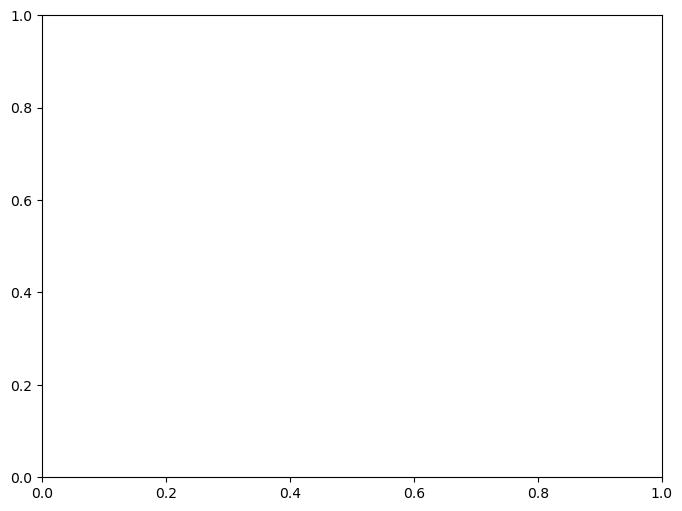

In [20]:

# Select a feature and the classification label
feature_name = 'mfccs'
classification_label = 'Classification_Label'

# Plot the selected feature against the classification label
plt.figure(figsize=(8, 6))
plt.scatter(X, Y)
plt.title(f'Scatter Plot of {feature_name} vs {classification_label}')
plt.xlabel(feature_name)
plt.ylabel(classification_label)
plt.grid(True)
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the features and the classification label
# 'features' is a list of feature names to visualize (e.g., MFCCs)
# 'classification_label' is the name of the column containing the classification labels

# Sample data (replace this with your actual data)
data = {
    'Feature_1': [5, 7, 2, 5, 8, 1],
    'Feature_2': [1, 3, 6, 9, 2, 5],
    'Classification_Label': ['A', 'B', 'A', 'A', 'B', 'B']
}

# Create a DataFrame
df = pd.DataFrame(data)

# List of feature names
features = ['Feature_1', 'Feature_2']  # Add more feature names as needed

# Name of the column containing classification labels
classification_label = 'Classification_Label'

# Loop through each feature and create KDE plots
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=feature, hue=classification_label, fill=True, alpha=0.5, palette='Set1')
    plt.title(f'KDE Plot of {feature} by {classification_label}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title=classification_label)
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the features and the classification label
# 'features' is a list of feature names to visualize (e.g., MFCCs)
# 'classification_label' is the name of the column containing the classification labels

# Sample data (replace this with your actual data)
data = {
    'Feature_1': [0.5, 0.7, 1.2, 1.5, 1.8, 2.1],
    'Feature_2': [1.1, 1.3, 1.6, 1.9, 2.2, 2.5],
    'Classification_Label': ['A', 'B', 'A', 'A', 'B', 'B']
}

# Create a DataFrame
df = pd.DataFrame(data)

# List of feature names
features = ['Feature_1', 'Feature_2']  # Add more feature names as needed

# Name of the column containing classification labels
classification_label = 'Classification_Label'

# Create separate KDE plots for each feature with respect to classification labels
for feature in features:
    g = sns.FacetGrid(df, col=classification_label, hue=classification_label)
    g.map(sns.kdeplot, feature)
    g.add_legend()
    plt.title(f'Distribution of {feature} by {classification_label}')
    plt.show()


In [27]:
df.head()

,Unnamed: 0,File Name,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,low,good,excellent,category
0,0,29_audio.wav,-2.558627,-2.316059,-2.271928,-2.167459,-1.012644,-0.766544,-0.730626,-1.649334,...,0.501104,0.380764,0.364891,0.427991,0.439193,0.484969,0.709890,0.680682,0.702986,1
1,1,68_audio.wav,-2.980663,-2.736011,-0.521187,-0.848618,-0.707429,0.423838,0.410516,1.267307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,92_audio.wav,-2.492121,-2.465798,-2.489711,-2.413806,-1.183820,-1.316758,-0.989441,-1.236956,...,0.363995,0.025381,0.000000,0.000000,0.000000,0.000000,0.744238,0.678753,0.732652,1
3,3,167_audio.wav,-3.142767,-1.895777,-0.817423,-0.956117,0.305237,0.640528,1.312892,1.152519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,214_audio.wav,-2.754371,-2.753473,-2.753528,-0.933587,-0.711726,-0.917892,-1.716798,-1.058946,...,0.322358,-0.043042,0.000668,0.040334,0.112364,0.326456,0.000000,0.000000,0.000000,0


In [29]:
low_df = df[df['category'] == 0]

In [30]:
low_df

,Unnamed: 0,File Name,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,low,good,excellent,category
1,1,68_audio.wav,-2.980663,-2.736011,-0.521187,-0.848618,-0.707429,0.423838,0.410516,1.267307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
3,3,167_audio.wav,-3.142767,-1.895777,-0.817423,-0.956117,0.305237,0.640528,1.312892,1.152519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
4,4,214_audio.wav,-2.754371,-2.753473,-2.753528,-0.933587,-0.711726,-0.917892,-1.716798,-1.058946,...,0.322358,-0.043042,0.000668,0.040334,0.112364,0.326456,0.0,0.0,0.0,0
5,5,242_audio.wav,-3.184307,-1.378602,-1.106414,-1.380014,-1.301606,-2.160876,0.594591,1.067254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
9,9,539_audio.wav,-3.277676,-1.358252,-1.086161,-1.386188,-1.216168,-1.598713,-1.440727,-2.550264,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,340060_audio.wav,-2.754544,-2.277864,-1.080855,-1.467921,-1.835293,0.370408,0.554203,0.857706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
9996,9996,340085_audio.wav,-2.821990,-2.821990,-0.275285,-1.194424,-0.495084,-1.516992,-2.686134,0.394085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
10001,10001,340179_audio.wav,-2.906668,-2.898966,-2.578875,-2.907791,-0.557548,-0.300755,-1.269649,-2.126853,...,0.237841,-0.156295,-0.085093,0.847515,-0.076328,0.438859,0.0,0.0,0.0,0
10004,10004,340289_audio.wav,-2.803725,-2.035296,-0.665426,-1.103890,-1.421706,-2.290086,-2.594301,0.311252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0


In [34]:
low_df.drop(['Unnamed: 0','low','excellent','good'],axis =1)

,File Name,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,category
1,68_audio.wav,-2.980663,-2.736011,-0.521187,-0.848618,-0.707429,0.423838,0.410516,1.267307,1.023346,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,167_audio.wav,-3.142767,-1.895777,-0.817423,-0.956117,0.305237,0.640528,1.312892,1.152519,0.305237,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,214_audio.wav,-2.754371,-2.753473,-2.753528,-0.933587,-0.711726,-0.917892,-1.716798,-1.058946,-0.745817,...,-0.068405,0.445844,0.345000,0.322358,-0.043042,0.000668,0.040334,0.112364,0.326456,0
5,242_audio.wav,-3.184307,-1.378602,-1.106414,-1.380014,-1.301606,-2.160876,0.594591,1.067254,1.118902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
9,539_audio.wav,-3.277676,-1.358252,-1.086161,-1.386188,-1.216168,-1.598713,-1.440727,-2.550264,0.180554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,340060_audio.wav,-2.754544,-2.277864,-1.080855,-1.467921,-1.835293,0.370408,0.554203,0.857706,1.054767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
9996,340085_audio.wav,-2.821990,-2.821990,-0.275285,-1.194424,-0.495084,-1.516992,-2.686134,0.394085,0.394085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
10001,340179_audio.wav,-2.906668,-2.898966,-2.578875,-2.907791,-0.557548,-0.300755,-1.269649,-2.126853,-0.527047,...,-0.279612,0.033684,0.287243,0.237841,-0.156295,-0.085093,0.847515,-0.076328,0.438859,0
10004,340289_audio.wav,-2.803725,-2.035296,-0.665426,-1.103890,-1.421706,-2.290086,-2.594301,0.311252,0.751204,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
